### 1 Preparing the data
In the following programm we will read our datasets, understand their content and try to structured it a little bit.
For this we will start by importing all the necessary libraries and packages.

In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

#### 1.1 Gathering the data

Lets read first our .csv file.

In [430]:
df = pd.read_csv('./listings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6803 entries, 0 to 6802
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6803 non-null   int64  
 1   listing_url                                   6803 non-null   object 
 2   scrape_id                                     6803 non-null   int64  
 3   last_scraped                                  6803 non-null   object 
 4   source                                        6803 non-null   object 
 5   name                                          6803 non-null   object 
 6   description                                   6559 non-null   object 
 7   neighborhood_overview                         3321 non-null   object 
 8   picture_url                                   6803 non-null   object 
 9   host_id                                       6803 non-null   i

#### 1.2 Assessing the data

Now we will filter the data frame, to consider only the columns that are relevant for our study.

In [431]:
df_filtered = df[["host_id","host_location","latitude","longitude","host_since","host_is_superhost","property_type","room_type","accommodates","bathrooms","bedrooms","beds","amenities","price","availability_365","number_of_reviews","estimated_occupancy_l365d","review_scores_rating","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location"]]
df_filtered.describe()

,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,availability_365,number_of_reviews,estimated_occupancy_l365d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
count,6.803000e+03,6803.000000,6803.000000,6803.000000,5970.000000,6633.000000,5961.000000,6803.000000,6803.000000,6803.000000,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000
mean,2.341937e+08,43.259000,-2.499724,4.033368,1.510050,2.003166,2.986412,173.766133,50.945612,68.243422,4.751092,4.769419,4.794030,4.839850,4.758696
std,2.002567e+08,0.156180,0.436777,2.358972,1.006046,1.246039,2.264917,119.556106,86.659598,80.439036,0.300745,0.310428,0.271362,0.246637,0.300070
min,5.955000e+04,42.487640,-3.437597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,5.575606e+07,43.257457,-2.925270,2.000000,1.000000,1.000000,1.000000,66.000000,4.000000,6.000000,4.660000,4.680000,4.730000,4.790000,4.670000
50%,1.745906e+08,43.301350,-2.662021,4.000000,1.000000,2.000000,3.000000,180.000000,18.000000,36.000000,4.830000,4.860000,4.880000,4.920000,4.840000
75%,4.128942e+08,43.323850,-1.985727,5.000000,2.000000,3.000000,4.000000,276.000000,59.000000,102.000000,4.950000,4.970000,4.960000,5.000000,4.970000
max,6.855334e+08,43.447287,-1.757010,16.000000,24.000000,25.000000,29.000000,365.000000,1241.000000,255.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Conclusion: Here we can see that the top occupancy is **255 days/year.** This will be very important to know in order to answer our first question below.

Lets have a look now at the values

In [432]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6803 entries, 0 to 6802
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      6803 non-null   int64  
 1   host_location                4882 non-null   object 
 2   latitude                     6803 non-null   float64
 3   longitude                    6803 non-null   float64
 4   host_since                   6802 non-null   object 
 5   host_is_superhost            6677 non-null   object 
 6   property_type                6803 non-null   object 
 7   room_type                    6803 non-null   object 
 8   accommodates                 6803 non-null   int64  
 9   bathrooms                    5970 non-null   float64
 10  bedrooms                     6633 non-null   float64
 11  beds                         5961 non-null   float64
 12  amenities                    6803 non-null   object 
 13  price             

As we can observe, the dataset contains several columns with missing values and a variety of data types.
Our next step will be to examine each column individually to assess the nature of the missing data. Based on this evaluation, we will decide whether to remove the NaN values or impute new ones to ensure the integrity of the DataFrame.

#### 1.3 Cleaning and preparing the data

##### **Host_id:** Since we only want to consider properties that are properly associated with a host, we decided to drop the rows, which will serve as the foundation for analyzing the remaining columns.

In [433]:
df_filtered = df_filtered[(df_filtered["host_id"] != 0) & (df_filtered["host_id"].dropna())]
df_filtered.shape

(3386, 22)

The number of host_id to be consider is **3386**. This means that a maximum of 3386 rows will be consider in our study.

##### **host_location:** Lets have a look at the locations

In [434]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3386 entries, 1 to 6802
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      3386 non-null   int64  
 1   host_location                2472 non-null   object 
 2   latitude                     3386 non-null   float64
 3   longitude                    3386 non-null   float64
 4   host_since                   3386 non-null   object 
 5   host_is_superhost            3321 non-null   object 
 6   property_type                3386 non-null   object 
 7   room_type                    3386 non-null   object 
 8   accommodates                 3386 non-null   int64  
 9   bathrooms                    2963 non-null   float64
 10  bedrooms                     3314 non-null   float64
 11  beds                         2956 non-null   float64
 12  amenities                    3386 non-null   object 
 13  price                  

In [435]:
df_filtered[(df_filtered["host_location"].isna())].shape

(914, 22)

We can see that there are 914 NaN values (3386 - 2472) that need to be analyzed in detail.
If the locations are not there, maybe we can use the latitude and longitude to find out the missing locations.

In [436]:
df_locations = df_filtered[(df_filtered["host_location"].isna())]
df_locations = df_locations[["host_id","host_location","latitude","longitude"]]
df_locations.describe()

,host_id,latitude,longitude
count,9.140000e+02,914.000000,914.000000
mean,4.041047e+08,43.259853,-2.589842
std,1.706242e+08,0.148354,0.414347
min,7.600870e+05,42.487640,-3.437597
25%,2.813737e+08,43.255510,-2.930903
50%,4.506725e+08,43.286430,-2.721175
75%,5.170170e+08,43.323530,-2.166655
max,6.855334e+08,43.435740,-1.775680


We observed that **914** rows with missing location values have very similar latitude and longitude coordinates. This suggests that either all these properties are located in the same place, or the coordinates do not reflect their true locations.

By examining the average latitude and longitude on Google Maps, we found that they point to an area near Munitibar-Arbatzegi Gerrikaitz (Spain), which appears to be a sparsely populated region with only a few houses.

This led us to conclude that **these coordinates are not representative of reality** and **can therefore be excluded from our dataset.**

In [437]:
df_filtered = df_filtered[~df_filtered["host_location"].isna()]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2472 entries, 1 to 6802
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      2472 non-null   int64  
 1   host_location                2472 non-null   object 
 2   latitude                     2472 non-null   float64
 3   longitude                    2472 non-null   float64
 4   host_since                   2472 non-null   object 
 5   host_is_superhost            2420 non-null   object 
 6   property_type                2472 non-null   object 
 7   room_type                    2472 non-null   object 
 8   accommodates                 2472 non-null   int64  
 9   bathrooms                    2188 non-null   float64
 10  bedrooms                     2419 non-null   float64
 11  beds                         2183 non-null   float64
 12  amenities                    2472 non-null   object 
 13  price                  

##### **Bathrooms,bedrooms,beds:** Now we want to consider only the properties that have usefull data for this attributes.

In [438]:
df_filtered = df_filtered[(~df_filtered["bathrooms"].isna())&(~df_filtered["bedrooms"].isna())&(~df_filtered["beds"].isna())]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2182 entries, 1 to 6802
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      2182 non-null   int64  
 1   host_location                2182 non-null   object 
 2   latitude                     2182 non-null   float64
 3   longitude                    2182 non-null   float64
 4   host_since                   2182 non-null   object 
 5   host_is_superhost            2140 non-null   object 
 6   property_type                2182 non-null   object 
 7   room_type                    2182 non-null   object 
 8   accommodates                 2182 non-null   int64  
 9   bathrooms                    2182 non-null   float64
 10  bedrooms                     2182 non-null   float64
 11  beds                         2182 non-null   float64
 12  amenities                    2182 non-null   object 
 13  price                  

At this stage, things have become clearer. Although we don't have reviews for all entries—only 1,949 out of a total of 2,182—we can still move forward with our analysis. The available data provides a sufficient foundation for continuing our study.

### 2 Questions  

#### Question 1: Which areas have the highest occupancy rate throughout the year?

To begin, we need to know how many different locations we have and then try to filter our data frame until we get the top 10% of the locations with the highest occupancy.

In [439]:
df_filtered["host_location"].unique().shape

(174,)

**174** is the total number of unique locations in our data frame.
Let's check now the values for the columns **estimated_occupancy_l365d**.

In [440]:
df_filtered["estimated_occupancy_l365d"].describe()

count    2182.000000
mean       76.131072
std        85.061982
min         0.000000
25%         6.000000
50%        42.000000
75%       114.000000
max       255.000000
Name: estimated_occupancy_l365d, dtype: float64

We can observe that the maximum days booked for a certain location in Euskadi is 255 days/year.
Now we just have to filter these locations and reduce the result to the locations with **255days/year.**

In [441]:
df_locations = df_filtered[df_filtered["estimated_occupancy_l365d"]==255]
df_locations.shape

(220, 22)

In [442]:
df_locations["host_location"].unique().shape

(35,)

In [443]:
df_locations["host_location"].unique()

array(['Bilbao, Spain', 'Donostia-San Sebastián, Spain',
       'Donostia-San Sebastian, Spain', 'San Sebastián, Spain',
       'Urnieta, Spain', 'Orio, Spain', 'Berreaga-Mendi, Spain', 'Spain',
       'Sopelana, Spain', 'Basque Country, Spain', 'Pasaia, Spain',
       'Vitoria-Gasteiz, Spain', 'Calahorra, Spain', 'Getxo, Spain',
       'Guernica, Spain', 'Donostia, Spain', 'Bermeo, Spain',
       'Usurbil, Spain', 'Zizurkil, Spain', 'Madrid, Spain',
       'Barakaldo, Spain', 'Pamplona, Spain', 'Berastegi, Spain',
       'Oiartzun, Spain', 'Gasteiz, Spain', 'Beasain, Spain',
       'West Hollywood, CA', 'Aramaio, Spain', 'Zumaia, Spain',
       'Sestao, Spain', 'Elgoibar, Spain',
       'Donostia / San Sebastián, Spain', 'Areatza, Spain',
       'Hendaye, France', 'Irun, Spain'], dtype=object)

**Conclusion: There are 35 locations with an estimated occupation of 255 day per year in Euskadi (see locations above)**

#### Question 2: Which areas in Euskadi show the highest demand relative to the number of available accommodations, indicating that demand significantly exceeds supply?

For this question we are looking for the highest value in ratio **demand/availavility**.  
So we have to create a new column that represents this value for each location on the list (**estimated_occupancy_l365d/availability_365**)

In [444]:
#Lets eliminate first the rows with availability = 0. Since this properties are not available anymore.
df_demand = df_filtered.loc[(df_filtered["availability_365"]!=0)&(df_filtered["availability_365"].notna())&(df_filtered["estimated_occupancy_l365d"]!=0)&(df_filtered["estimated_occupancy_l365d"].dropna())].copy()
df_demand.shape

(200, 22)

After droping the estimated_occupancy_l365d and availability_365 with values equal to 0 or NaN, we end up with **95** values.  
These are the entries to consider in our study.

In [445]:
df_demand["demand"] = df_demand["estimated_occupancy_l365d"] / df_demand["availability_365"]
df_demand

,host_id,host_location,latitude,longitude,host_since,host_is_superhost,property_type,room_type,accommodates,bathrooms,...,price,availability_365,number_of_reviews,estimated_occupancy_l365d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,demand
52,7238197,"Bilbao, Spain",43.257420,-2.924200,2013-07-02,NaN,Entire rental unit,Entire home/apt,3,1.0,...,$106.00,240,294,255,4.94,4.98,4.89,4.93,4.95,1.062500
54,7270859,"Donostia-San Sebastián, Spain",43.322230,-1.982310,2013-07-03,t,Private room in rental unit,Private room,3,2.0,...,$77.00,10,327,255,5.00,5.00,4.99,5.00,4.99,25.500000
127,16228557,"Donostia-San Sebastian, Spain",43.324360,-1.963910,2014-06-01,t,Private room in villa,Private room,3,1.0,...,$61.00,249,597,255,4.82,4.90,4.91,4.94,4.78,1.024096
160,12336523,"Bilbao, Spain",43.251820,-2.932390,2014-02-17,f,Entire rental unit,Entire home/apt,3,1.0,...,$92.00,49,639,255,4.64,4.74,4.76,4.85,4.29,5.204082
206,10718635,"Bilbao, Spain",43.254500,-2.923880,2013-12-19,t,Private room in rental unit,Private room,2,1.0,...,$73.00,282,491,255,4.76,4.79,4.82,4.86,4.84,0.904255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,236286471,"Hendaye, France",43.343290,-1.766640,2019-01-13,t,Private room in home,Private room,3,1.0,...,$34.00,351,64,255,4.94,4.98,4.95,4.94,4.70,0.726496
5999,29271895,"San Sebastián, Spain",43.309950,-1.980310,2015-03-13,t,Entire rental unit,Entire home/apt,6,2.0,...,$193.00,217,55,255,4.95,4.91,4.89,4.96,4.76,1.175115
6001,366242627,"Bilbao, Spain",43.271178,-2.969922,2020-09-06,f,Entire rental unit,Entire home/apt,4,1.0,...,$64.00,243,43,255,4.79,4.93,4.77,4.91,4.16,1.049383
6090,19371177,"Irun, Spain",43.332820,-1.827440,2014-08-03,t,Entire rental unit,Entire home/apt,2,1.0,...,$50.00,26,57,255,4.86,4.84,4.70,4.98,4.70,9.807692


We can see that the maximum value of the demand-to-availability ratio is **28.33**.  
The next step is to identify the specific locations associated with these high-demand entries.

In [446]:
df_locations = df_demand[df_demand["demand"].round(2) == 28.33]["host_location"]
df_locations.shape

(1,)

In [447]:
df_locations

5159    Donostia-San Sebastian, Spain
Name: host_location, dtype: object

**Conclusion:** The answer to this question is **Donostia (Sans Sebastian), Spain**.

#### Question 3: What review-related factors are most influential in driving Airbnb property demand, and how should an Airbnb property be designed to maximize its potential demand?

##### **Preparing the data**

First, we want to eliminate the NaN values, since they do not contribute to our analysis. We only want to work with rows that contain complete information.

In [448]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2182 entries, 1 to 6802
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      2182 non-null   int64  
 1   host_location                2182 non-null   object 
 2   latitude                     2182 non-null   float64
 3   longitude                    2182 non-null   float64
 4   host_since                   2182 non-null   object 
 5   host_is_superhost            2140 non-null   object 
 6   property_type                2182 non-null   object 
 7   room_type                    2182 non-null   object 
 8   accommodates                 2182 non-null   int64  
 9   bathrooms                    2182 non-null   float64
 10  bedrooms                     2182 non-null   float64
 11  beds                         2182 non-null   float64
 12  amenities                    2182 non-null   object 
 13  price                  

In [449]:
df_filtered = df_filtered.dropna()

Now we want to drop the columns that are not relevant to answer our question.

In [450]:
df_filtered = df_filtered[["host_location","property_type","room_type","accommodates","bathrooms","bedrooms","beds","amenities","price","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","estimated_occupancy_l365d","number_of_reviews","review_scores_rating"]]

##### **What review-related factors are most influential in driving Airbnb property demand?**

In [451]:
review_columns = [col for col in df_filtered.columns if col.startswith("review")]
review_columns

['review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating']

In [452]:
df_demand = df_filtered[['review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
    'number_of_reviews',
'estimated_occupancy_l365d']]
df_demand

,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,number_of_reviews,estimated_occupancy_l365d
1,4.91,4.51,4.63,4.70,4.84,81,60
2,4.85,4.85,4.92,4.92,4.79,14,248
3,4.82,4.75,4.71,4.81,4.69,17,248
4,4.91,4.94,4.94,4.97,4.97,34,124
5,4.70,4.93,4.84,4.86,4.72,107,224
...,...,...,...,...,...,...,...
6658,4.50,4.75,4.75,4.75,4.75,4,24
6724,5.00,5.00,5.00,5.00,5.00,1,6
6738,5.00,4.67,5.00,4.33,5.00,3,18
6745,5.00,5.00,5.00,5.00,5.00,1,6


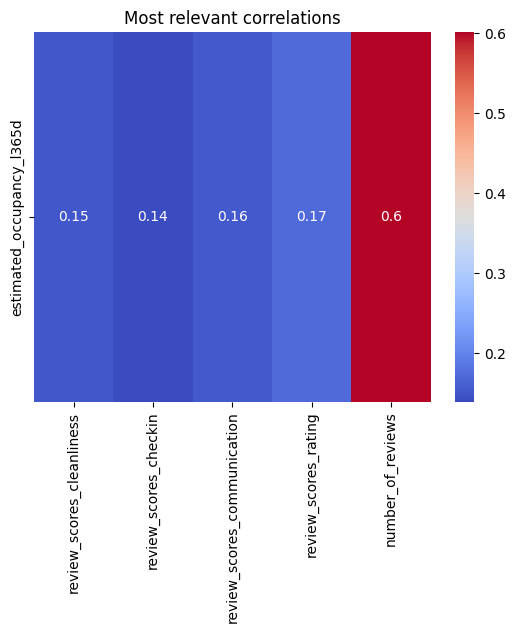

In [453]:
import seaborn as sns
correlation_matrix = df_demand.corr()
correlations = correlation_matrix["estimated_occupancy_l365d"].drop("estimated_occupancy_l365d")

threshold = 0.1
filtered = correlations[correlations.abs() > threshold]

sns.heatmap(filtered.to_frame().T, annot=True, cmap='coolwarm')
plt.title('Most relevant correlations')
plt.show()

**Conclusion:** We can observe a strong relationship between estimated_occupancy_l365d and the features mentioned above.

##### **How should an Airbnb property be designed to maximize its potential demand?**

###### **Romm and Property Type**
Now we can also observe that some columns contain categorical data. To analyze their impact as well, we need to convert these categorical variables into numerical ones.  
But first lets filter the categorical columns.

In [454]:
df_categorical = df_filtered.select_dtypes(include=["object"])
df_categorical.shape

(1910, 5)

In [455]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1910 entries, 1 to 6764
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_location  1910 non-null   object
 1   property_type  1910 non-null   object
 2   room_type      1910 non-null   object
 3   amenities      1910 non-null   object
 4   price          1910 non-null   object
dtypes: object(5)
memory usage: 89.5+ KB


We need to eliminate the dollar character and convert our price values into float values (numeric values with decimals).

Among all the categorical columns, only a few are meaningful to transform into numerical values for our analysis:  
**property_type  
room_type**  
So we'll focus on working with those.

In [456]:
df_categorical = df_categorical[["property_type","room_type"]]
categorical_columns = list(df_categorical.columns)
print(categorical_columns)

['property_type', 'room_type']


We want to create a DataFrame that includes all the original numerical columns from df_filtered, along with the categorical columns transformed into numerical ones using dummy variables, by running a predefined function.

In [457]:
def create_dummy_df (df,cat_cols):
    '''
    Input:
    df: A DataFrame containing categorical variables to be converted.
    cat_cols: A list of strings representing the names of the categorical columns to be transformed.

    Output:
    df is a new DataFrame with the following characteristics:
        - It includes all columns from the original DataFrame that were not specified as categorical.
        - It removes all the original categorical columns.
        - It adds dummy columns for each of the categorical columns listed in cat_cols.
    '''
    for col in cat_cols:
        try:
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True).astype(int)], axis=1)
        except:
            continue
    return df

In [458]:
df_type = df_filtered[["property_type","room_type","estimated_occupancy_l365d"]]

In [459]:
df_type = create_dummy_df(df_type,categorical_columns)
df_type.info

<bound method DataFrame.info of       estimated_occupancy_l365d  property_type_Casa particular  \
1                            60                              0   
2                           248                              0   
3                           248                              0   
4                           124                              0   
5                           224                              0   
...                         ...                            ...   
6658                         24                              0   
6724                          6                              0   
6738                         18                              0   
6745                          6                              0   
6764                          6                              0   

      property_type_Earthen home  property_type_Entire bungalow  \
1                              0                              0   
2                              0         

In [460]:
df_type = df_type.dropna()
df_type.describe()

,estimated_occupancy_l365d,property_type_Casa particular,property_type_Earthen home,property_type_Entire bungalow,property_type_Entire cabin,property_type_Entire chalet,property_type_Entire condo,property_type_Entire cottage,property_type_Entire guest suite,property_type_Entire guesthouse,...,property_type_Room in hotel,property_type_Room in serviced apartment,property_type_Shared room in bed and breakfast,property_type_Shared room in hostel,property_type_Shared room in vacation home,property_type_Tiny home,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,...,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.00000,1910.000000
mean,84.819372,0.001571,0.000524,0.000524,0.002094,0.009424,0.023560,0.024084,0.003141,0.002618,...,0.007853,0.001047,0.000524,0.003141,0.000524,0.000524,0.000524,0.004712,0.24712,0.004188
std,85.369884,0.039611,0.022881,0.022881,0.045727,0.096645,0.151714,0.153349,0.055974,0.051111,...,0.088294,0.032351,0.022881,0.055974,0.022881,0.022881,0.022881,0.068500,0.43145,0.064600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


First, we will choose the property and room type with the highest potential.  

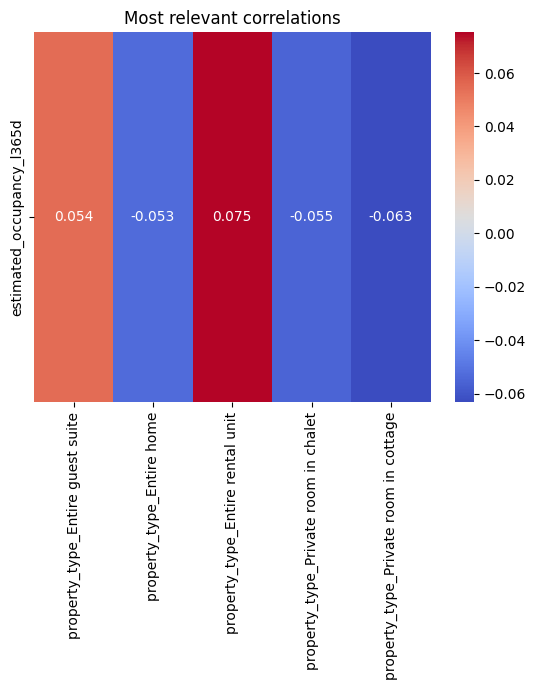

In [461]:
correlation_matrix = df_type.corr()
correlations = correlation_matrix["estimated_occupancy_l365d"].drop("estimated_occupancy_l365d")

threshold = 0.05
filtered = correlations[correlations.abs() > threshold]

sns.heatmap(filtered.to_frame().T, annot=True, cmap='coolwarm')
plt.title('Most relevant correlations')
plt.show()

In [462]:
property_type = ["Entire rental unit",
                 "Private room in chalet",
                 "Private room in cottage"]
property_type

['Entire rental unit', 'Private room in chalet', 'Private room in cottage']

**These are the most relevant property types.**

###### **Top amenities:**  
We want to consider all relevant features for our case, but also take it a step further into a more specific level. Here, we encounter the amenities column, which contains valuable information that we cannot yet evaluate, as the values are stored as text. Let’s explore how we can transform these values into something more tangible.  

Our goal is to identify the most commonly offered amenities and, subsequently, determine which of them are most valued by customers.

In [463]:
#Transforming the text into lists and convertir the data format.

import ast
from collections import Counter

df_filtered["amenities"] = df_filtered["amenities"].apply(
    lambda x: [item.encode('utf-8').decode('unicode_escape') for item in ast.literal_eval(x)] if isinstance(x, str) else 
              [item.encode('utf-8').decode('unicode_escape') for item in x]
)

all_amenities = sum(df_filtered["amenities"],[])
counter = Counter(all_amenities)

In [464]:
frequent_amenities = {amenity: count for amenity, count in counter.items() if count >= 1200}
len(frequent_amenities)

14

In [465]:
frequent_amenities

{'Heating': 1319,
 'Refrigerator': 1411,
 'Essentials': 1606,
 'Dishes and silverware': 1503,
 'Cooking basics': 1310,
 'Microwave': 1429,
 'Hangers': 1472,
 'Hot water': 1612,
 'Hair dryer': 1614,
 'Kitchen': 1613,
 'Iron': 1432,
 'Wifi': 1690,
 'Bed linens': 1457,
 'TV': 1251}

We ended up with the following most common ammenities:  
**Heating  
Refrigerator  
Essentials  
Dishes and silverware  
Cooking basics  
Microwave  
Hangers  
Hot water  
Hair dryer  
Kitchen  
Iron    
Wifi  
Bed linens  
TV**

In [466]:
lista = ["Heating",
"Refrigerator",
"Essentials",
"Dishes and silverware",
"Cooking basics",
"Microwave",
"Hangers",
"Hot water",
"Hair dryer",
"Kitchen",
"Iron",
"Wifi",
"Bed linens",
"TV"]

These are the most relevant ammenities that our property should offer.

###### **Accomodations, bathrooms and beds**  
We now want to break down these columns to clearly differentiate the exact number of accommodations, bathrooms, and beds that our future property should have.

In [467]:
print(property_type)

['Entire rental unit', 'Private room in chalet', 'Private room in cottage']


In [468]:
df_filtered = df_filtered[
    df_filtered["property_type"].isin(property_type)][["estimated_occupancy_l365d", "accommodates", "bathrooms", "beds"]]

In [469]:
df_filtered

,estimated_occupancy_l365d,accommodates,bathrooms,beds
1,60,4,1.0,3.0
2,248,8,2.0,5.0
3,248,8,2.0,5.0
4,124,8,2.0,3.0
9,42,4,1.0,3.0
...,...,...,...,...
6581,24,4,1.0,3.0
6651,12,2,1.0,1.0
6658,24,4,1.0,3.0
6724,6,4,2.0,4.0


In [470]:
df_dummies = pd.get_dummies(df_filtered, columns=["accommodates"], prefix="accomodates = ", drop_first=True)
df_dummies = df_dummies.astype(int)
df_dummies

,estimated_occupancy_l365d,bathrooms,beds,accomodates = _2,accomodates = _3,accomodates = _4,accomodates = _5,accomodates = _6,accomodates = _7,accomodates = _8,accomodates = _9,accomodates = _10,accomodates = _14,accomodates = _16
1,60,1,3,0,0,1,0,0,0,0,0,0,0,0
2,248,2,5,0,0,0,0,0,0,1,0,0,0,0
3,248,2,5,0,0,0,0,0,0,1,0,0,0,0
4,124,2,3,0,0,0,0,0,0,1,0,0,0,0
9,42,1,3,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6581,24,1,3,0,0,1,0,0,0,0,0,0,0,0
6651,12,1,1,1,0,0,0,0,0,0,0,0,0,0
6658,24,1,3,0,0,1,0,0,0,0,0,0,0,0
6724,6,2,4,0,0,1,0,0,0,0,0,0,0,0


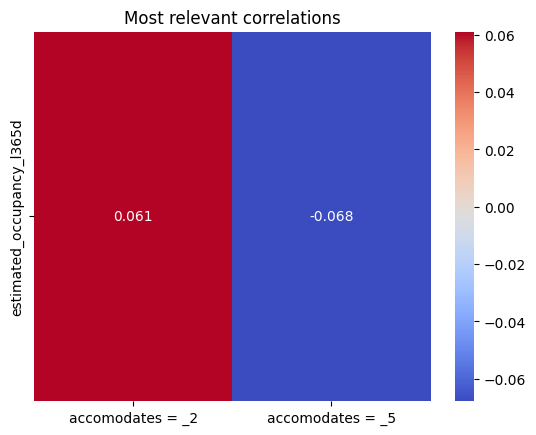

In [471]:
correlation_matrix = df_dummies.corr()
correlations = correlation_matrix["estimated_occupancy_l365d"].drop(["estimated_occupancy_l365d","beds","bathrooms"])

threshold = 0.06
filtered = correlations[correlations.abs() > threshold]

sns.heatmap(filtered.to_frame().T, annot=True, cmap='coolwarm')
plt.title('Most relevant correlations')
plt.show()

In [472]:
df_dummies = pd.get_dummies(df_filtered, columns=["beds"], prefix="beds = ", drop_first=True)
df_dummies = df_dummies.astype(int)

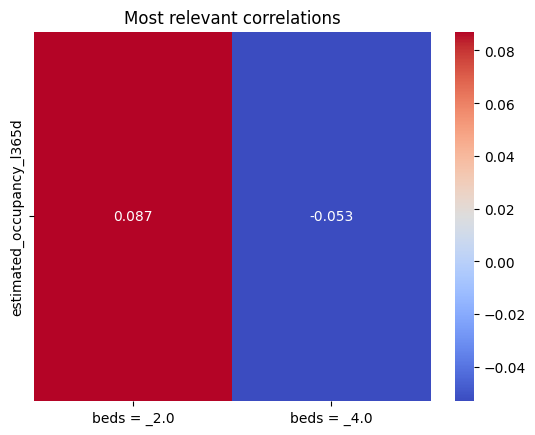

In [473]:
correlation_matrix = df_dummies.corr()
correlations = correlation_matrix["estimated_occupancy_l365d"].drop(["estimated_occupancy_l365d","accommodates","bathrooms"])

threshold = 0.05
filtered = correlations[correlations.abs() > threshold]

sns.heatmap(filtered.to_frame().T, annot=True, cmap='coolwarm')
plt.title('Most relevant correlations')
plt.show()

In [474]:
df_dummies = pd.get_dummies(df_filtered, columns=["bathrooms"], prefix="bathrooms = ", drop_first=True)
df_dummies = df_dummies.astype(int)

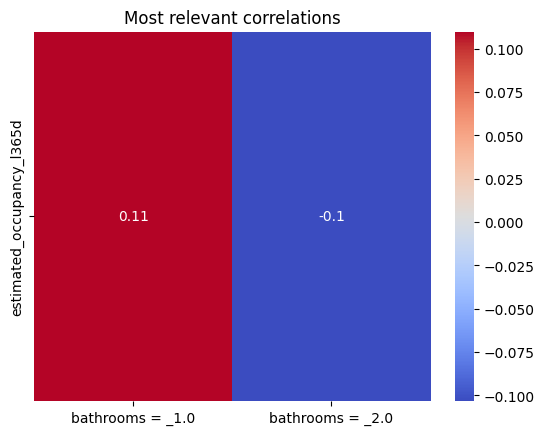

In [476]:
correlation_matrix = df_dummies.corr()
correlations = correlation_matrix["estimated_occupancy_l365d"].drop(["estimated_occupancy_l365d","beds","accommodates"])

threshold = 0.05
filtered = correlations[correlations.abs() > threshold]

sns.heatmap(filtered.to_frame().T, annot=True, cmap='coolwarm')
plt.title('Most relevant correlations')
plt.show()

Conclusion: Based on the analysis of how individual values of bathrooms, beds, accommodates, and the types of property and room influence the estimated occupancy, we conclude that the optimal combination of features to achieve the highest estimated occupancy includes:  

**Entire rental unit for 2 people, with 2 beds and 1 bathroom.** 